In [1]:
import pandas as pd

In [ ]:
#import os
#os.getcwd()
#os.chdir("C:\\Users\\v-thiram\\Desktop\\Python")

In [60]:
data=pd.read_csv("Movie Lens.csv",header=None,encoding = "ISO-8859-1")

In [4]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),1-Jan-95,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),1-Jan-95,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),1-Jan-95,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),1-Jan-95,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),1-Jan-95,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [61]:
data.columns=["ID", "Title", "ReleaseDate", "VideoReleaseDate", "IMDB", "Unknown", "Action", "Adventure", "Animation", "Childrens", "Comedy", "Crime", "Documentary", "Drama", "Fantasy", "FilmNoir", "Horror", "Musical", "Mystery", "Romance", "SciFi", "Thriller", "War", "Western"]

In [62]:
data.head()

,ID,Title,ReleaseDate,VideoReleaseDate,IMDB,Unknown,Action,Adventure,Animation,Childrens,...,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,1,Toy Story (1995),1-Jan-95,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),1-Jan-95,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),1-Jan-95,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),1-Jan-95,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),1-Jan-95,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [63]:
# Remove unnecessary variables
data.drop(['ID','ReleaseDate','VideoReleaseDate','IMDB'],axis=1,inplace=True)

In [64]:
data.drop_duplicates(inplace=True)

In [65]:
data.shape

(1664, 20)

In [66]:
data1=data.drop(['Title'],axis=1)

In [48]:
#from sklearn.preprocessing import StandardScaler
#standard_scaler = StandardScaler()
#standard_scaler.fit_transform(data1)

In [49]:
#data1.describe()

In [13]:
#Importing Libraries
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
import seaborn as sns
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

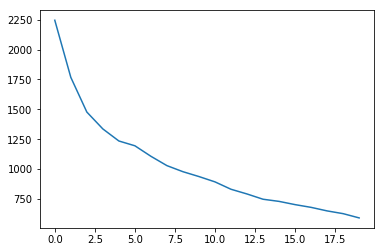

In [67]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, random_state=10)
    model_clus.fit(data1)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [68]:
model_clus5 = KMeans(n_clusters = 10, random_state=10)
model_clus5.fit(data1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=10, tol=0.0001, verbose=0)

In [69]:
from scipy.stats import itemfreq
itemfreq(model_clus5.labels_)

C:\Users\v-rakart\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  


array([[  0,  84],
       [  1, 131],
       [  2, 162],
       [  3, 563],
       [  4, 102],
       [  5, 308],
       [  6,  31],
       [  7, 128],
       [  8, 115],
       [  9,  40]], dtype=int64)

In [70]:
data2= pd.concat([data1, pd.Series(model_clus5.labels_)], axis=1)

In [71]:
data2.columns=[    'Unknown',      'Action',   'Adventure',   'Animation',
         'Childrens',      'Comedy',       'Crime', 'Documentary',
             'Drama',     'Fantasy',    'FilmNoir',      'Horror',
           'Musical',     'Mystery',     'Romance',       'SciFi',
          'Thriller',         'War',     'Western', 'Cluster']

In [72]:
data3=pd.concat([data.Title,data2],axis=1)

In [73]:
data3.head(n=10)
data3.to_csv('data3.csv')

In [74]:
Unknown_clusters=pd.DataFrame(data2.groupby(["Cluster"]).Unknown.mean())
Actions_clusters = pd.DataFrame(data2.groupby(["Cluster"]).Action.mean())
Adventure_clusters=pd.DataFrame(data2.groupby(["Cluster"]).Adventure.mean())
Animation_clusters=pd.DataFrame(data2.groupby(["Cluster"]).Animation.mean())
Childrens_clusters=pd.DataFrame(data2.groupby(["Cluster"]).Childrens.mean())
Comedy_clusters=pd.DataFrame(data2.groupby(["Cluster"]).Comedy.mean())
Crime_clusters=pd.DataFrame(data2.groupby(["Cluster"]).Crime.mean())
Documentary_clusters=pd.DataFrame(data2.groupby(["Cluster"]).Documentary.mean())
Drama_clusters=pd.DataFrame(data2.groupby(["Cluster"]).Drama.mean())
Fantasy_clusters=pd.DataFrame(data2.groupby(["Cluster"]).Fantasy.mean())
FilmNoir_clusters=pd.DataFrame(data2.groupby(["Cluster"]).FilmNoir.mean())
Horror_clusters=pd.DataFrame(data2.groupby(["Cluster"]).Horror.mean())
Musical_clusters=pd.DataFrame(data2.groupby(["Cluster"]).Musical.mean())
Mystery_clusters=pd.DataFrame(data2.groupby(["Cluster"]).Mystery.mean())
Romance_clusters = pd.DataFrame(data2.groupby(["Cluster"]).Romance.mean())
SciFi_clusters=pd.DataFrame(data2.groupby(["Cluster"]).SciFi.mean())
Thriller_clusters=pd.DataFrame(data2.groupby(["Cluster"]).Thriller.mean())
War_clusters=pd.DataFrame(data2.groupby(["Cluster"]).War.mean())
Western_clusters=pd.DataFrame(data2.groupby(["Cluster"]).Western.mean())

In [75]:
df = pd.concat([pd.Series([0,1,2,3,4,5,6,7,8,9],name='Cluster'),Unknown_clusters, Actions_clusters,Adventure_clusters
               ,Animation_clusters,Childrens_clusters, Comedy_clusters,Crime_clusters,Documentary_clusters,
               Drama_clusters,Fantasy_clusters,FilmNoir_clusters,Horror_clusters, Musical_clusters,
               Mystery_clusters, Romance_clusters,SciFi_clusters,Thriller_clusters,War_clusters,Western_clusters], axis=1)

In [76]:
df

,Cluster,Unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,0,0.000000,0.130952,0.059524,0.023810,0.059524,0.238095,0.071429,0.011905,0.559524,0.011905,0.000000,0.035714,0.035714,0.023810,0.345238,0.059524,0.095238,0.035714,0.023810
1,1,0.000000,0.155039,0.093023,0.023256,0.062016,0.372093,0.054264,0.007752,0.418605,0.000000,0.007752,0.054264,0.015504,0.038760,0.279070,0.015504,0.131783,0.023256,0.007752
2,2,0.006250,0.118750,0.050000,0.018750,0.043750,0.200000,0.075000,0.043750,0.375000,0.018750,0.018750,0.143750,0.043750,0.043750,0.131250,0.068750,0.106250,0.043750,0.018750
3,3,0.000000,0.103074,0.041591,0.007233,0.036166,0.291139,0.039783,0.037975,0.509946,0.009042,0.021700,0.037975,0.027125,0.034358,0.133816,0.043400,0.132007,0.043400,0.012658
4,4,0.009804,0.352941,0.392157,0.039216,0.117647,0.274510,0.088235,0.009804,0.284314,0.029412,0.029412,0.068627,0.049020,0.009804,0.127451,0.205882,0.176471,0.058824,0.009804
5,5,0.000000,0.094771,0.065359,0.035948,0.111111,0.454248,0.052288,0.029412,0.359477,0.016340,0.003268,0.045752,0.035948,0.026144,0.114379,0.045752,0.111111,0.039216,0.009804
6,6,0.000000,0.000000,0.000000,0.225806,0.354839,0.290323,0.032258,0.032258,0.387097,0.000000,0.000000,0.000000,0.193548,0.032258,0.032258,0.064516,0.129032,0.000000,0.096774
7,7,0.000000,0.351562,0.085938,0.039062,0.093750,0.257812,0.093750,0.031250,0.289062,0.031250,0.007812,0.039062,0.031250,0.039062,0.164062,0.109375,0.250000,0.039062,0.039062
8,8,0.000000,0.130435,0.095652,0.026087,0.086957,0.208696,0.156522,0.034783,0.443478,0.000000,0.026087,0.069565,0.026087,0.078261,0.086957,0.052174,0.269565,0.017391,0.008696
9,9,0.000000,0.410256,0.076923,0.000000,0.025641,0.128205,0.076923,0.025641,0.564103,0.025641,0.000000,0.051282,0.000000,0.051282,0.076923,0.025641,0.282051,0.230769,0.025641


In [28]:
import seaborn as sns

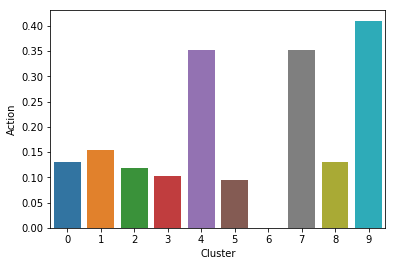

In [77]:
sns.barplot(x=df.Cluster, y=df.Action)

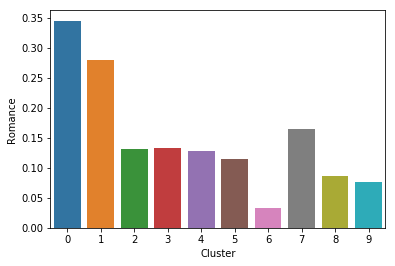

In [78]:
sns.barplot(x=df.Cluster, y=df.Romance)